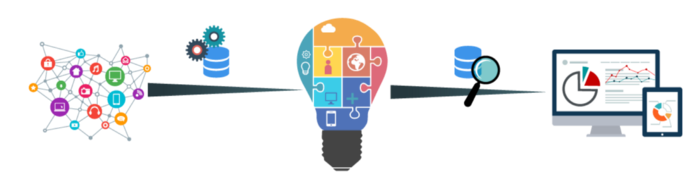

# Projeto Hashtag - Criação de um modelo de regressão <br>
### Contexto: Será realizado uma análise do conjunto de dados de habitação da Califórnia. Os dados utilizados são da biblioteca scikit-learn, através do link https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing, que foram obtido do repositório StatLib https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html. <br>
##### Este conjunto de dados foi derivado do censo dos EUA de 1990, usando uma linha por grupo de blocos censitários. Um grupo de blocos é a menor unidade geográfica para os EUA. O Census Bureau publica dados de amostra (um grupo de quarteirões normalmente tem uma população de 600 a 3.000 pessoas). <br>
##### Uma família é um grupo de pessoas que residem em uma casa. Dado que o número médio de divisões e quartos neste conjunto de dados é fornecido por agregado familiar, estas colunas podem assumir valores surpreendentemente elevados para grupos de quarteirões com poucos agregados familiares e muitas casas vazias, tais como resorts de férias. <br>

<br>

### Dicionário de dados:
O dataset "Busca de Moradia na California" da Biblioteca scikit-learn possui as seguintes colunas:
* MedInc = median income in block group (renda média no grupo de blocos)
* HouseAge = median house age in block group (idade média da casa no grupo de quarteirões)
* AveRooms = average number of rooms per household (número médio de quartos por domicílio)
* AveBedrms = average number of bedrooms per household (número médio de quartos por domicílio)
* Population = block group population (bloquear população do grupo)
* AveOccup = average number of household members (número médio de membros da família)
* Latitude = block group latitude (bloquear latitude do grupo)
* Longitude = block group longitude (longitude do grupo de blocos)
* MedHouseVal = The target variable is the median house value for California districts expressed in hundreds of thousands of dollars (A variável alvo é o valor médio da casa para os distritos da Califórnia expresso em centenas de milhares de dólares)

#### Passo 1 - Importando as blibliotecas

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

#### Passo 2 - Importando a base de dados
* pip install -U scikit-learn

In [32]:
# Importando o dataset "Busca de Moradia na California"
from sklearn.datasets import fetch_california_housing

# Obtendo os dados do dataset
dados_california = fetch_california_housing()
pprint.pprint(dados_california)

{'DESCR': '.. _california_housing_dataset:\n'
          '\n'
          'California Housing dataset\n'
          '--------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 20640\n'
          '\n'
          '    :Number of Attributes: 8 numeric, predictive attributes and the '
          'target\n'
          '\n'
          '    :Attribute Information:\n'
          '        - MedInc        median income in block group\n'
          '        - HouseAge      median house age in block group\n'
          '        - AveRooms      average number of rooms per household\n'
          '        - AveBedrms     average number of bedrooms per household\n'
          '        - Population    block group population\n'
          '        - AveOccup      average number of household members\n'
          '        - Latitude      block group latitude\n'
          '        - Longitude     block group longitude\n'
          '\n'
  

#####  Analisando os dados do datasets 
* data (dados) é um array com os valores das observações (Valores das linhas)
* target (destino/alvo/objetivo) é um array com os valores médios das casas para a Califórnia.
* frame está vazio
* target_names (nomes de destino/alvo/objetivo) é um array com o(s) nome(s) da(s) coluna(s) da variável alvo → ['MedHouseVal']
* DESCR é uma string (Descrição do conjunto de dados habitacionais da Califórnia)
* feature_names (nomes de recursos) é uma lista com os valores dos atributos (Valores das colunas) → (['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'])

In [33]:
df_california = pd.DataFrame(dados_california.data) # Transformando os dados_california em um DataFrame
df_california.columns = dados_california.feature_names # Adicionando os nomes das colunas utilizando os nomes feature_names
df_california['ValorMedioCasa'] = dados_california.target # Adicionando a coluna Target ao DataFrame utilizando os valores médios das casas para a Califórnia

#### Passo 3 - Visualizando os dados e as informações dos dados

In [34]:
display(df_california.head())
df_california.info()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,ValorMedioCasa
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MedInc          20640 non-null  float64
 1   HouseAge        20640 non-null  float64
 2   AveRooms        20640 non-null  float64
 3   AveBedrms       20640 non-null  float64
 4   Population      20640 non-null  float64
 5   AveOccup        20640 non-null  float64
 6   Latitude        20640 non-null  float64
 7   Longitude       20640 non-null  float64
 8   ValorMedioCasa  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Passo 4 - Tratando os dados

In [35]:
# Renomeando as colunas para portugues
df_california = df_california.rename(columns={'MedInc': 'RendaMedia', 'HouseAge': 'IdadeMediaCasa', 'AveRooms': 'NrMedioAposento', 'AveBedrms':'NrMedioQuarto', 'Population':'Populacao', 'AveOccup':'NrMedioMembroFamiliar'})

In [36]:
df_california.duplicated().sum()

0

#### Passo 5 - Visualizando as informações estatísticas descritivas

In [37]:
df_california.describe()

,RendaMedia,IdadeMediaCasa,NrMedioAposento,NrMedioQuarto,Populacao,NrMedioMembroFamiliar,Latitude,Longitude,ValorMedioCasa
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### Passo 6 - Visualizando todas as variáveis utilizando gráficos

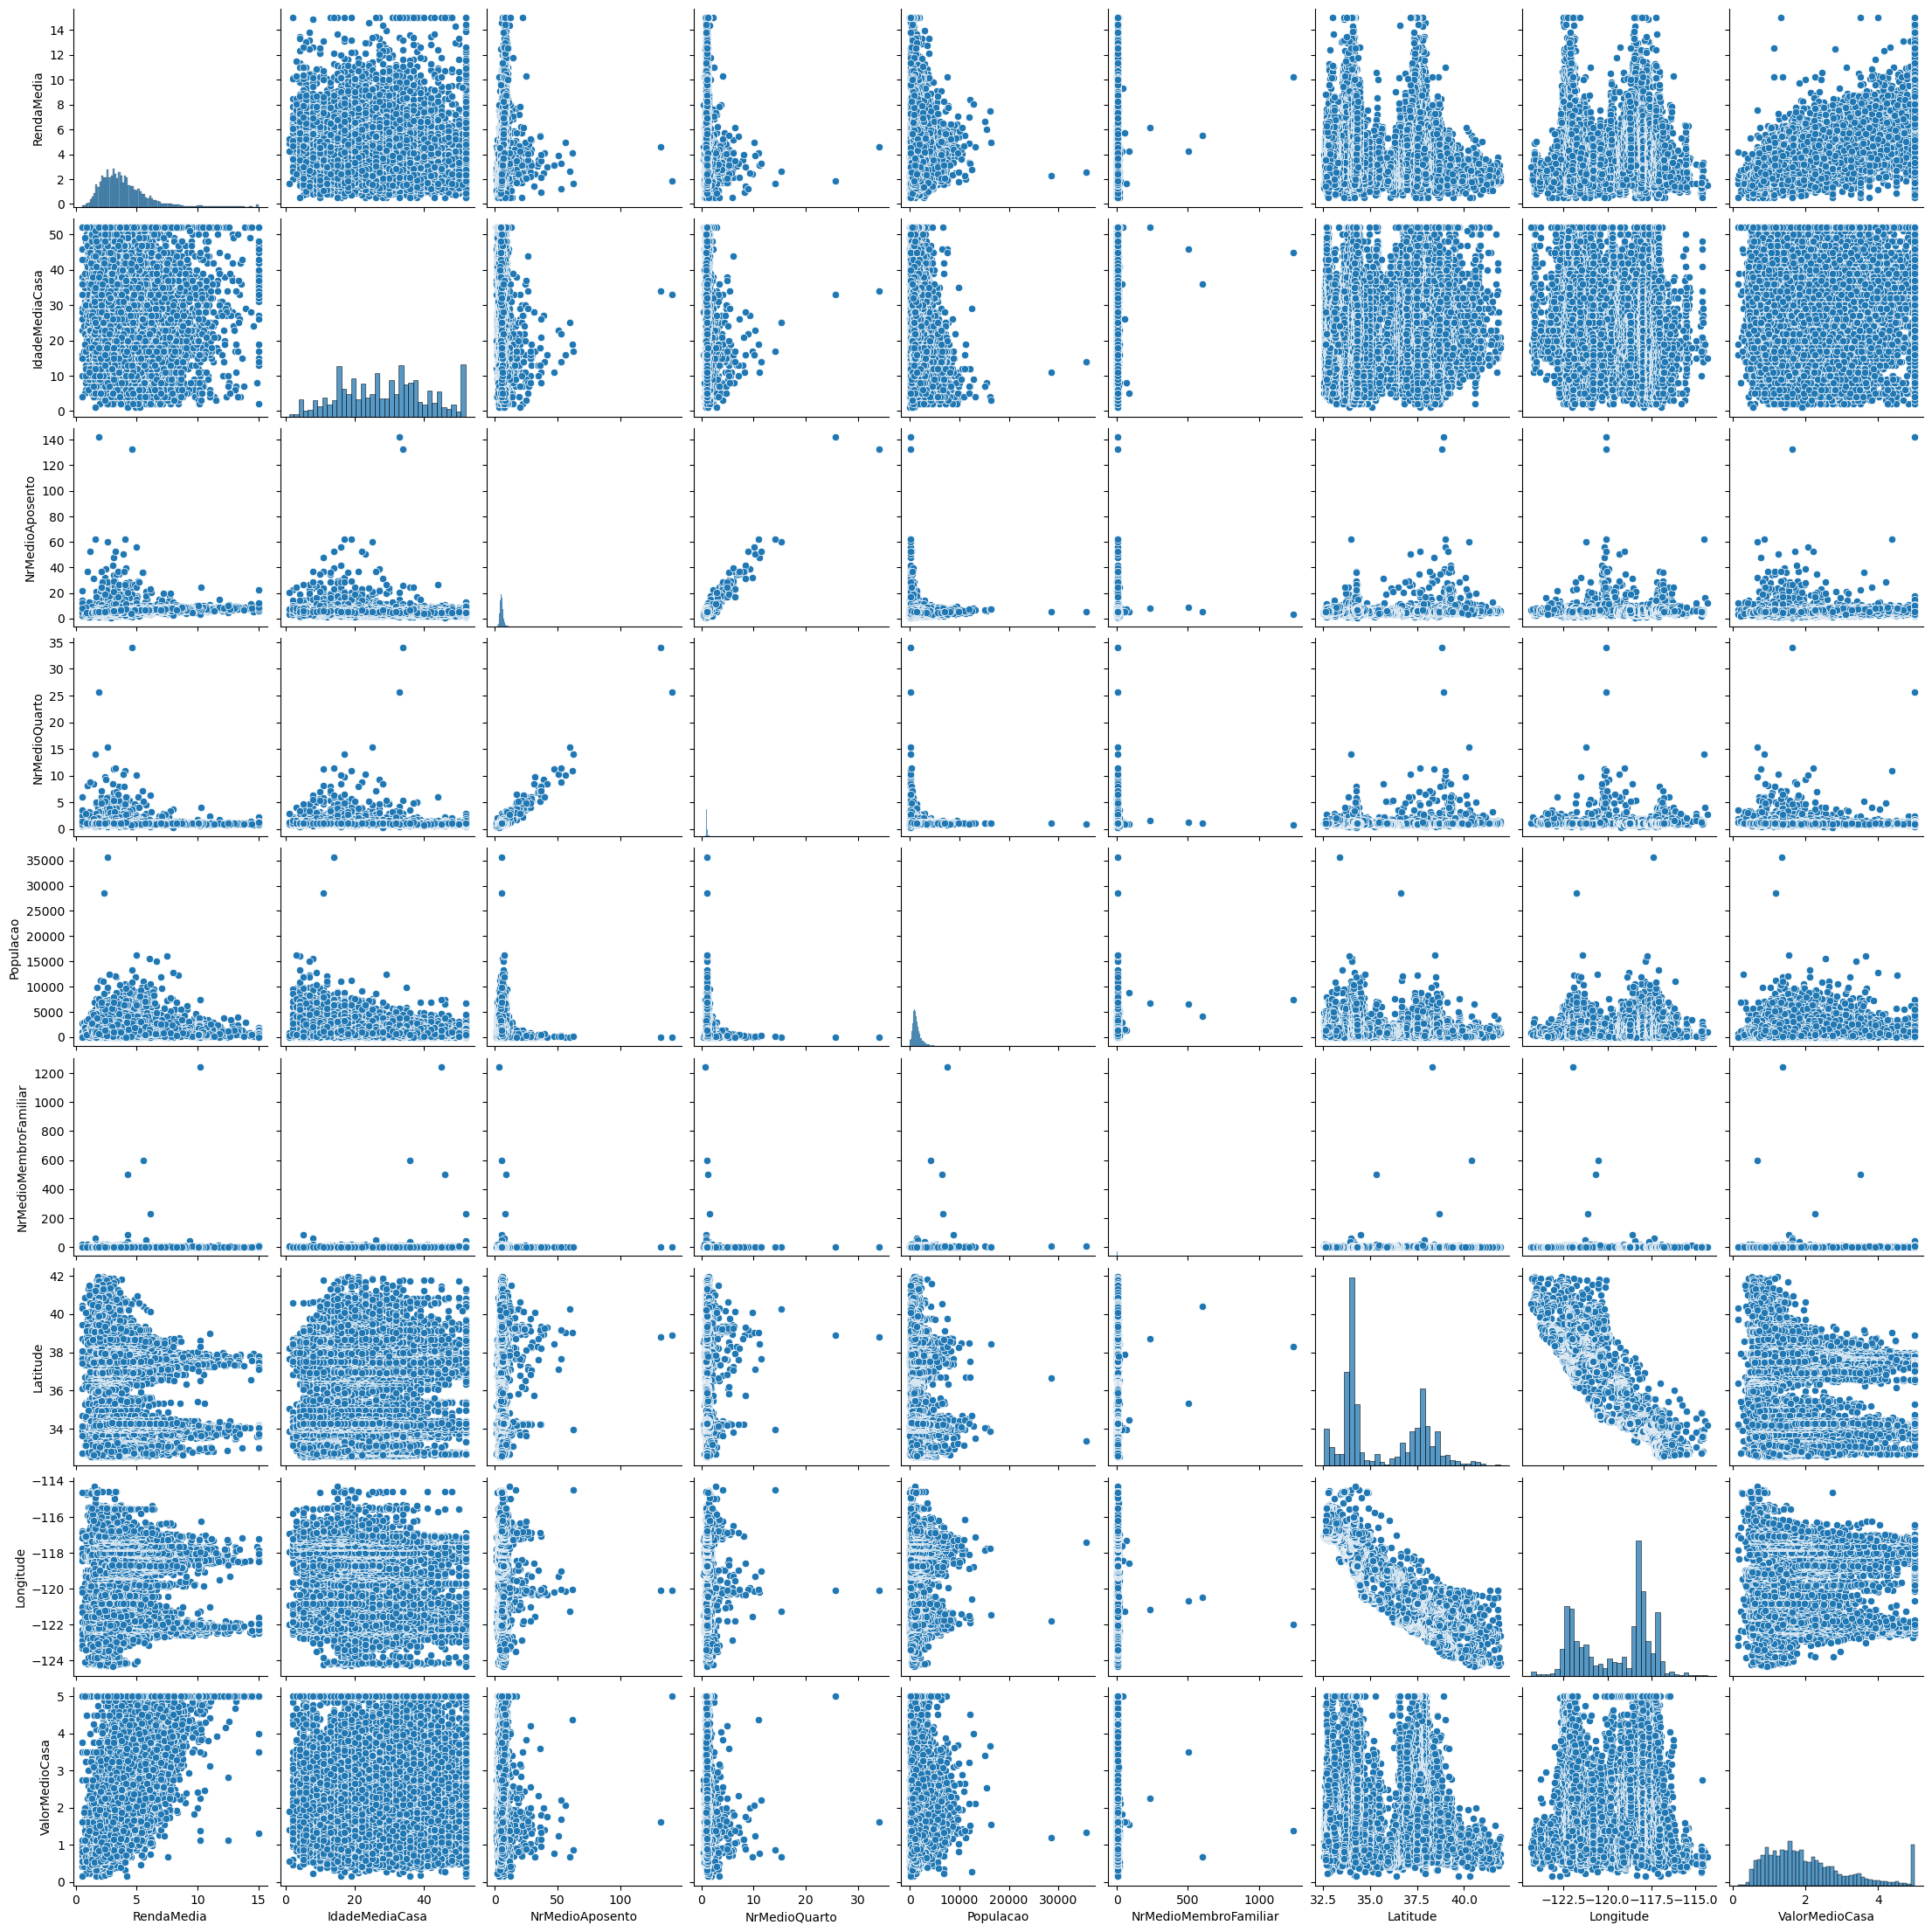

In [38]:
# Analisa os pares de 
sns.pairplot(df_california);

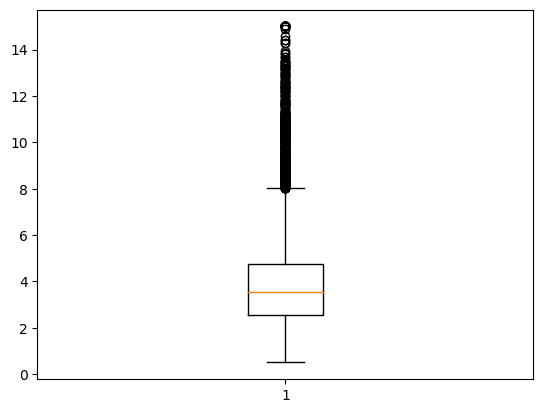

In [39]:
fig,ax = plt.subplots()
ax.boxplot(df_california.RendaMedia)
plt.show()

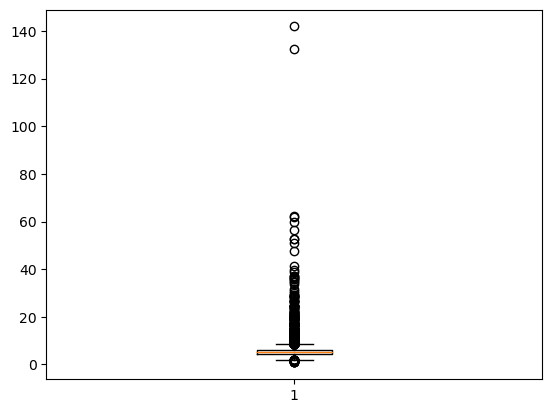

In [40]:
fig,ax = plt.subplots()
ax.boxplot(df_california.NrMedioAposento)
plt.show()

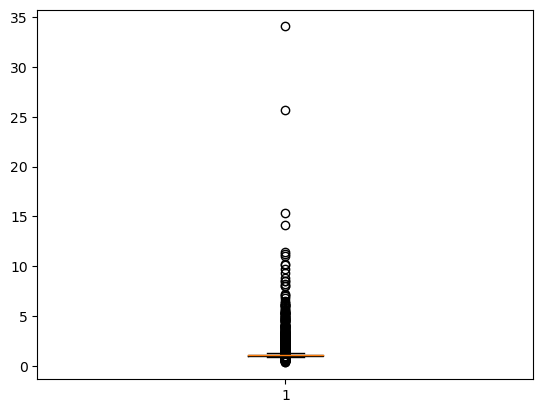

In [41]:
fig,ax = plt.subplots()
ax.boxplot(df_california.NrMedioQuarto)
plt.show()

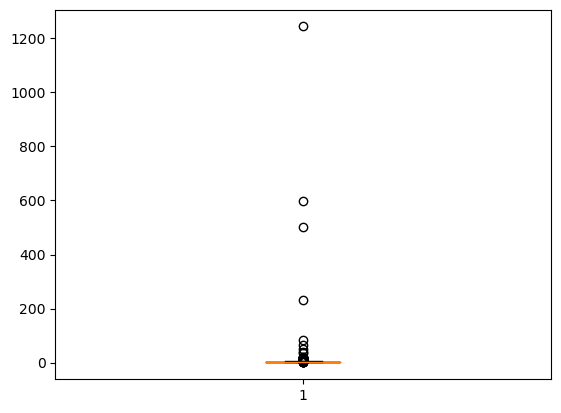

In [42]:
fig,ax = plt.subplots()
ax.boxplot(df_california.NrMedioMembroFamiliar)
plt.show()

##### Análise inicial do gráfico: A coluna NrMedioAposento possuem muitos 

##### Passo 7 - Analisando as correlações entre as variáveis 

In [43]:
df_california.corr()

,RendaMedia,IdadeMediaCasa,NrMedioAposento,NrMedioQuarto,Populacao,NrMedioMembroFamiliar,Latitude,Longitude,ValorMedioCasa
RendaMedia,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
IdadeMediaCasa,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
NrMedioAposento,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
NrMedioQuarto,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Populacao,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
NrMedioMembroFamiliar,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
ValorMedioCasa,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


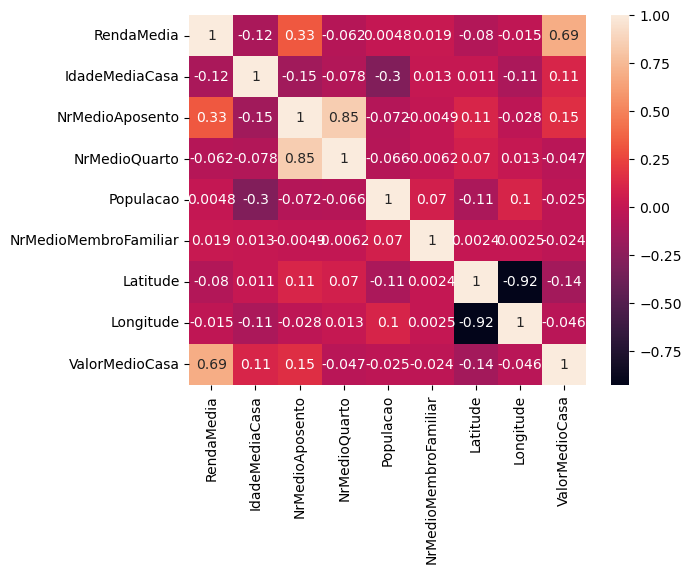

In [44]:
sns.heatmap(df_california.corr(),annot=True);

#### Passo 8 - Criando o modelo de Machine Learning para classificar melhor os pontos

In [45]:
# Criando novamente as variáveis X e y
var_X = df_california.drop('ValorMedioCasa',axis=1)
var_y = df_california.ValorMedioCasa

##### Conclusão inicial